가설 세우기



데이터 분석을 하기 위해서는 어떤 문제를 알아볼 것인지 가설을 세워야 합니다. 예시로 2개의 가설을 세워보겠습니다.



첫번째, 음주 여부는 건강검진 수치와 차이가 있을까요?



두번째, 신장 또는 허리둘레의 크기가 체중가 상관관계가 있을까요?



한번 알아보겠습니다.





라이브러리 로드

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


한글폰트 설정



Google colaboratory을 사용할 경우는 ctrl(cmd) + /로 주석을 없애서 실행을 합니다.



Jupyter notebook을 사용할 떄는 다음과 같이 코드를 작성합니다.

In [ ]:
import os

if os.name == 'posix':
    plt.rc("font, family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")
           
plt.rc("axes", unicode_minus=False)

In [6]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

데이터 불러오기
건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.
공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.

건강검진정보(2018) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do
2019년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2019년 데이터에 맞게 고쳐주시면 됩니다.
2019년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

In [7]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

df = pd.read_csv("C:/Users/USER/data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df.shape # 100만건 데이터 연도별로 해마다 100만건 엑셀로 열면 왜 판다스로 하는지 알 수 있음 로드가 느리고 컬럼 만들거나 연산하는게 느림 판다스는 100만건 이상 데이터 분석하는게 좋다

(1000000, 34)

# 5.1 데이터 미리보기

In [8]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

In [9]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

In [10]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
84557  2017    84558     1           17    11      155.0        65.0  90.0   

       시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
84557    0.5    0.7  ...   18.0   3.0   0.0          0      NaN    NaN   

       치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
84557      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

# 6 기본정보보기

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [12]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [13]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 7 결측치 보기

In [14]:
df.isnull()

기준년도  가입자일련번호   성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg 단위)  \
0       False    False  False        False  False      False       False   
1       False    False  False        False  False      False       False   
2       False    False  False        False  False      False       False   
3       False    False  False        False  False      False       False   
4       False    False  False        False  False      False       False   
...       ...      ...    ...          ...    ...        ...         ...   
999995  False    False  False        False  False      False       False   
999996  False    False  False        False  False      False       False   
999997  False    False  False        False  False      False       False   
999998  False    False  False        False  False      False       False   
999999  False    False  False        False  False      False       False   

         허리둘레  시력(좌)  시력(우)  ...  감마지티피   흡연상태   음주여부  구강검진 수검여부  치아우식증유무  \
0       False  False  False  ...  False  False  False      False     True   
1       False  False  False  ...  False  False  False      False     True   
2       False  False  False  ...  False  False  False      False     True   
3       False  False  False  ...  False  False  False      False     True   
4       False  False  False  ...  False  False  False      False     True   
...       ...    ...    ...  ...    ...    ...    ...        ...      ...   
999995  False  False  False  ...  False  False  False      False     True   
999996  False  False  False  ...  False  False  False      False     True   
999997  False  False  False  ...  False  False  False      False     True   
999998  False  False  False  ...  False  False  False      False     True   
999999  False  False  False  ...  False  False  False      False     True   

        결손치유무  치아마모증유무  제3대구치(사랑니)이상     치석  데이터공개일자  
0        True     True          True  False    False  
1        True     True          True  False    False  
2        True     True          True  False    False  
3        True     True          True   True    False  
4        True     True          True   True    False  
...       ...      ...           ...    ...      ...  
999995   True     True          True   True    False  
999996   True     True          True  False    False  
999997   True     True          True  False    False  
999998   True     True          True   True    False  
999999   True     True          True   True    False  

[1000000 rows x 34 columns]

In [15]:
# isnull()으로 결측치를 bool 값으로 표시하고, sum()으로 결측치의 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [16]:
df.isna()

기준년도  가입자일련번호   성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg 단위)  \
0       False    False  False        False  False      False       False   
1       False    False  False        False  False      False       False   
2       False    False  False        False  False      False       False   
3       False    False  False        False  False      False       False   
4       False    False  False        False  False      False       False   
...       ...      ...    ...          ...    ...        ...         ...   
999995  False    False  False        False  False      False       False   
999996  False    False  False        False  False      False       False   
999997  False    False  False        False  False      False       False   
999998  False    False  False        False  False      False       False   
999999  False    False  False        False  False      False       False   

         허리둘레  시력(좌)  시력(우)  ...  감마지티피   흡연상태   음주여부  구강검진 수검여부  치아우식증유무  \
0       False  False  False  ...  False  False  False      False     True   
1       False  False  False  ...  False  False  False      False     True   
2       False  False  False  ...  False  False  False      False     True   
3       False  False  False  ...  False  False  False      False     True   
4       False  False  False  ...  False  False  False      False     True   
...       ...    ...    ...  ...    ...    ...    ...        ...      ...   
999995  False  False  False  ...  False  False  False      False     True   
999996  False  False  False  ...  False  False  False      False     True   
999997  False  False  False  ...  False  False  False      False     True   
999998  False  False  False  ...  False  False  False      False     True   
999999  False  False  False  ...  False  False  False      False     True   

        결손치유무  치아마모증유무  제3대구치(사랑니)이상     치석  데이터공개일자  
0        True     True          True  False    False  
1        True     True          True  False    False  
2        True     True          True  False    False  
3        True     True          True   True    False  
4        True     True          True   True    False  
...       ...      ...           ...    ...      ...  
999995   True     True          True   True    False  
999996   True     True          True  False    False  
999997   True     True          True  False    False  
999998   True     True          True   True    False  
999999   True     True          True   True    False  

[1000000 rows x 34 columns]

In [17]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot:>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\sit

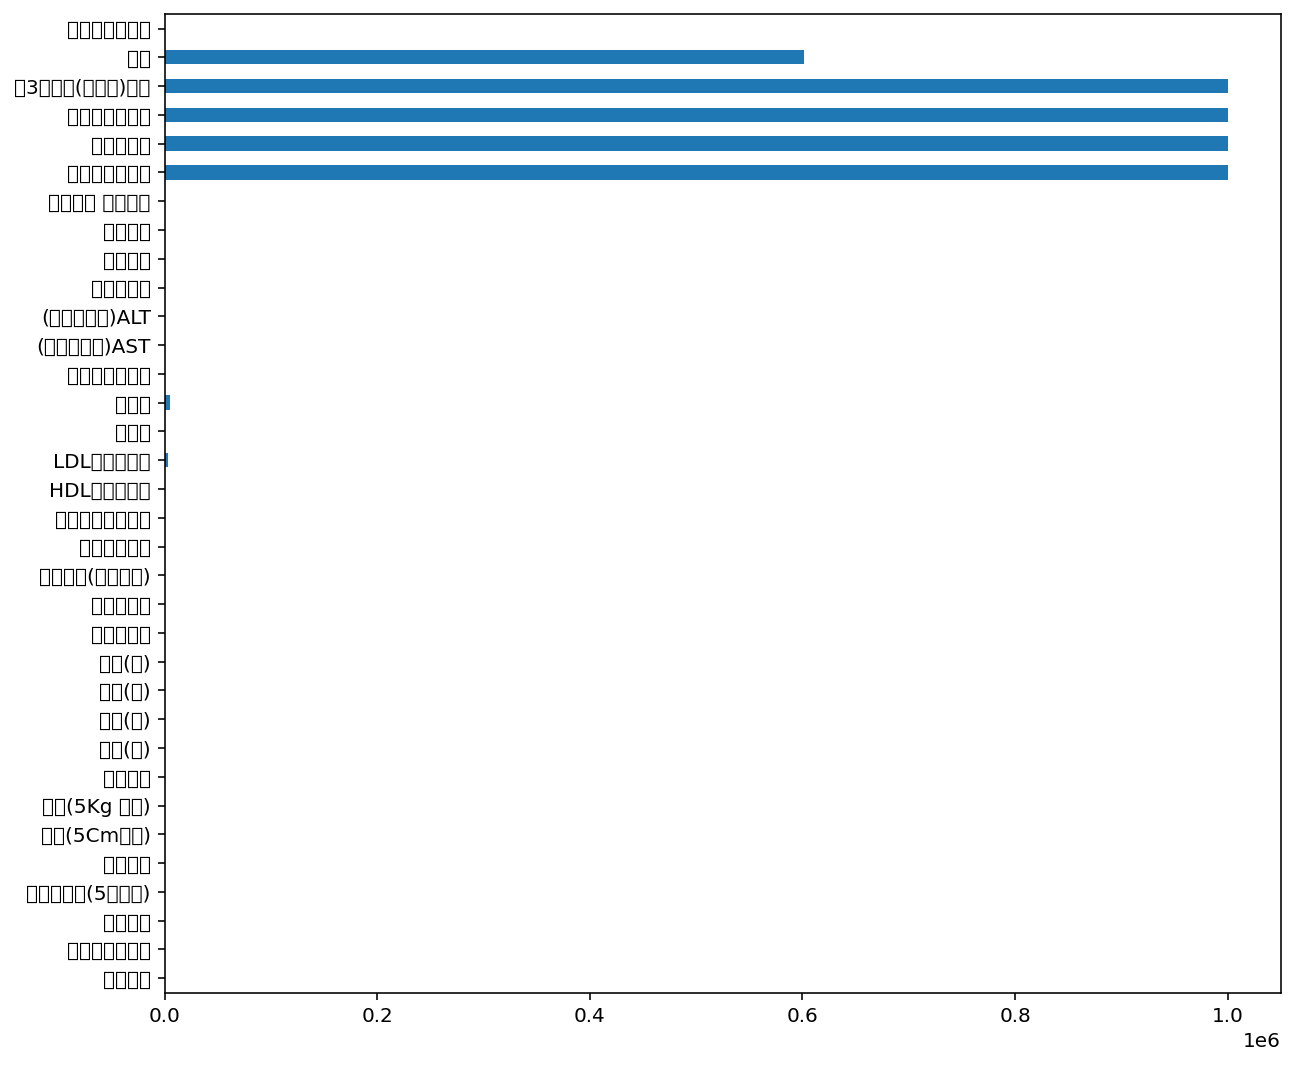

In [18]:
df.isnull().sum().plot.barh(figsize=(10,9))

# 8 일부 데이터 요약하기

In [19]:
 # 시리즈 형태 자료구조
    df["(혈청지오티)ALT"]

IndentationError: unexpected indent (206245080.py, line 2)

In [ ]:
#두개 컬럼은 리스트 형태로 감싸서 표현 [[]] 2차원의 리스트로 됨
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

In [ ]:
 # 데이터프레임 형태 자료구조
df[["(혈청지오티)ALT"]].head()
    

In [ ]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

In [ ]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

# 9 value_counts로 값 집계하기

In [ ]:
df["성별코드"].value_counts()

In [ ]:
df["흡연상태"].value_counts()

# 10 groupby 와 pivot_table 사용하기

In [ ]:
df.groupby(["성별코드"]).mean()

In [ ]:
df.groupby(["성별코드"]).count()

In [ ]:
df.groupby(["성별코드"])["가입자일련번호"].count()

In [ ]:
# 성별코드와 음주여부로 그룹화
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

In [ ]:
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()

In [ ]:
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

In [ ]:
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count","mean","median"])

# 10 pivot_table

In [ ]:
df.pivot_table(index="음주여부")

In [ ]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

In [ ]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

In [ ]:
pd.pivot_table(df, index="음주여부", values="감마지티피")

In [ ]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc='mean')

In [ ]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean","median"])

In [ ]:
pd.pivot_table(df, index="음주여부", values="감마지티피",
               aggfunc="describe")

In [ ]:
pd.pivot_table(df, index=["성별코드","음주여부"], values="감마지티피",
               aggfunc="describe")

# 11 히스토그램

100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기 때문에 groupby 또는 pivot_table로 연산을 하여 시각화하거나 필요한 데이터만 추출해서 시각화해보시길 권장합니다.

메모리 용량을 줄이기 위해서 대부분의 수치 데이터로 이루어져 있습니다.

In [ ]:
df.info()

In [ ]:
h = df.hist(figsize=(12,12))

In [ ]:
df.iloc[:, :]

In [ ]:
h = df.iloc[:, :12].hist(figsize=(12,12))

In [ ]:
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100)

In [ ]:
h = df.iloc[:, 24:].hist(figsize=(12,12), bins=10)

seaborn



시간이 오래 걸리기 때문에 데이터의 샘플로 그려야 합니다. 1000개를 사용합니다.



random_state=1을 사용하면 1,000,000개 중 랜덤으로 정해준 개수만큼 가져옵니다.

In [20]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 14 범주형(카테고리,문자열string) 데이터 시각화

# 14.1 countplot-음주여부

In [21]:
df["음주여부"].value_counts()

0.0    502729
1.0    496746
Name: 음주여부, dtype: int64

<AxesSubplot:>

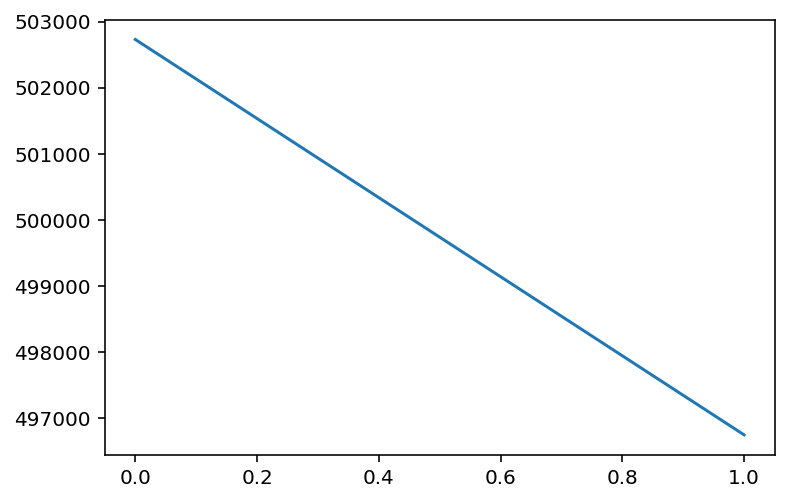

In [22]:
df["음주여부"].value_counts().plot()

<AxesSubplot:>

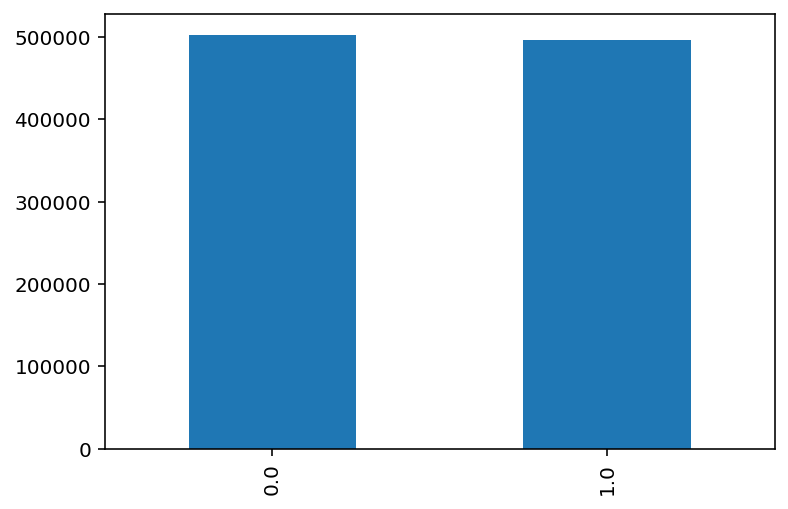

In [23]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


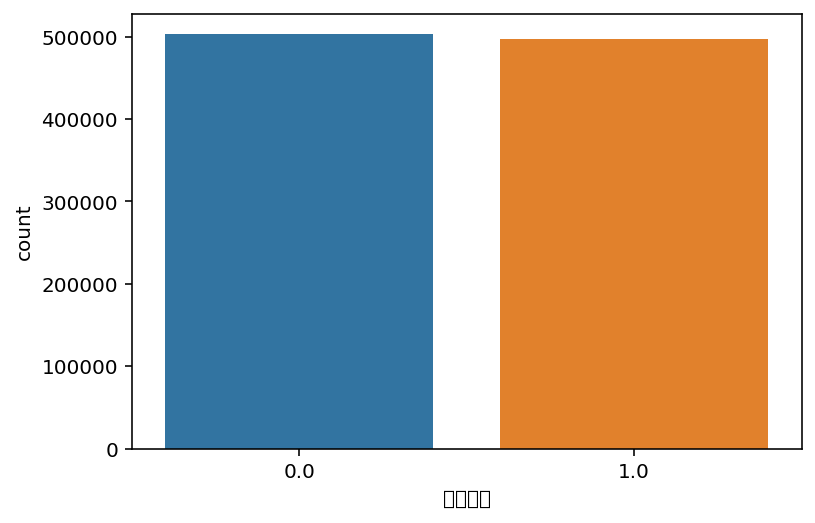

In [24]:
sns.countplot(x="음주여부",data=df)

<AxesSubplot:xlabel='성별코드', ylabel='count'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


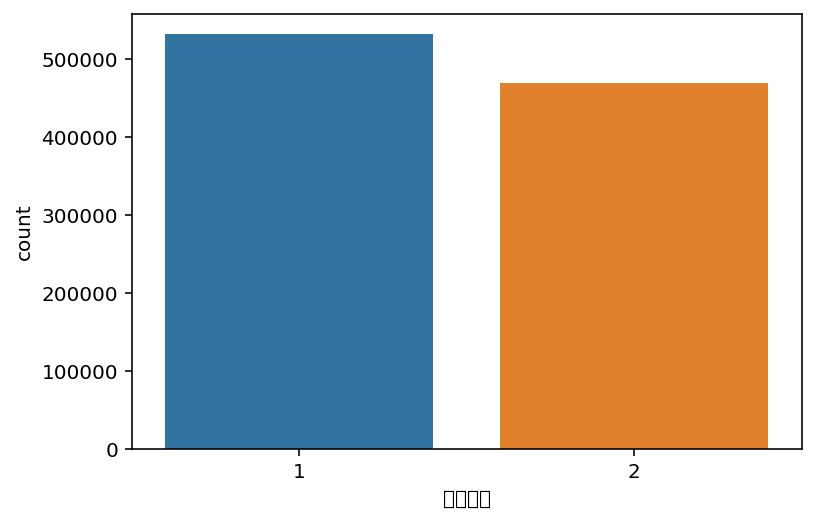

In [25]:
sns.countplot(x="성별코드",data=df)

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


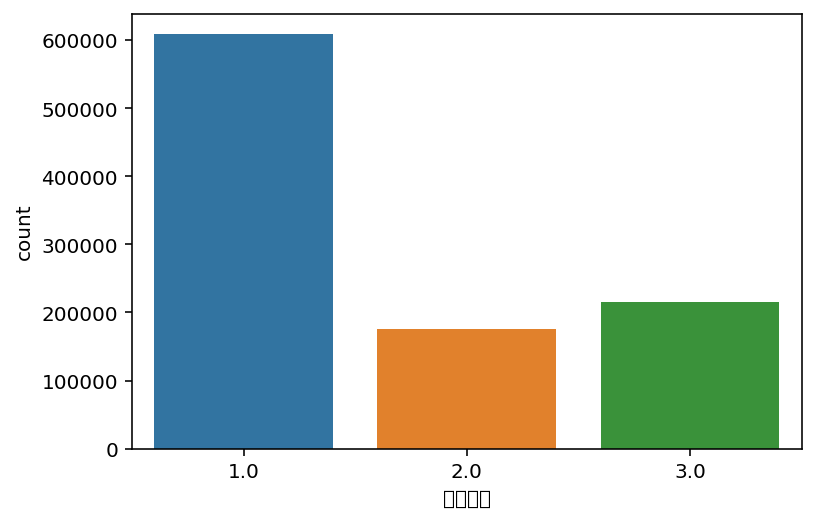

In [26]:
sns.countplot(x="흡연상태",data=df)

# 14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

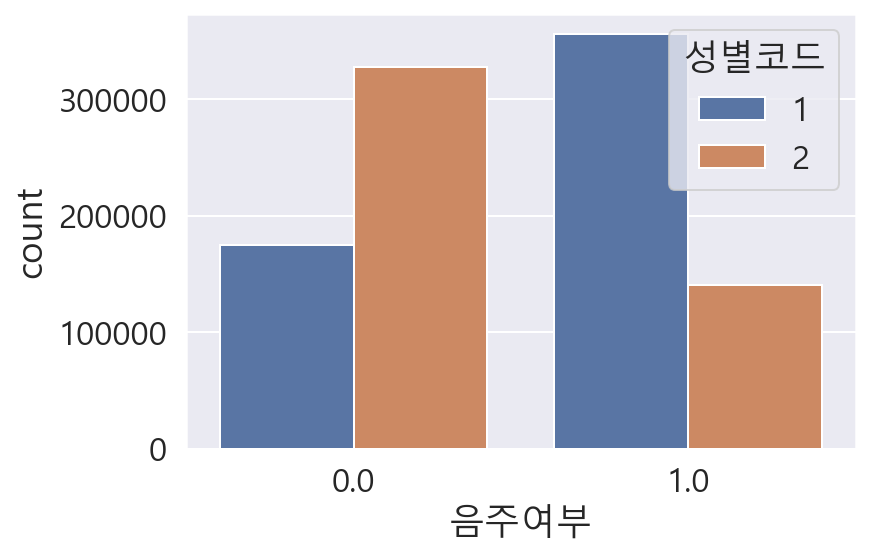

In [27]:
sns.set(font_scale=1.5, font="Malgun Gothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

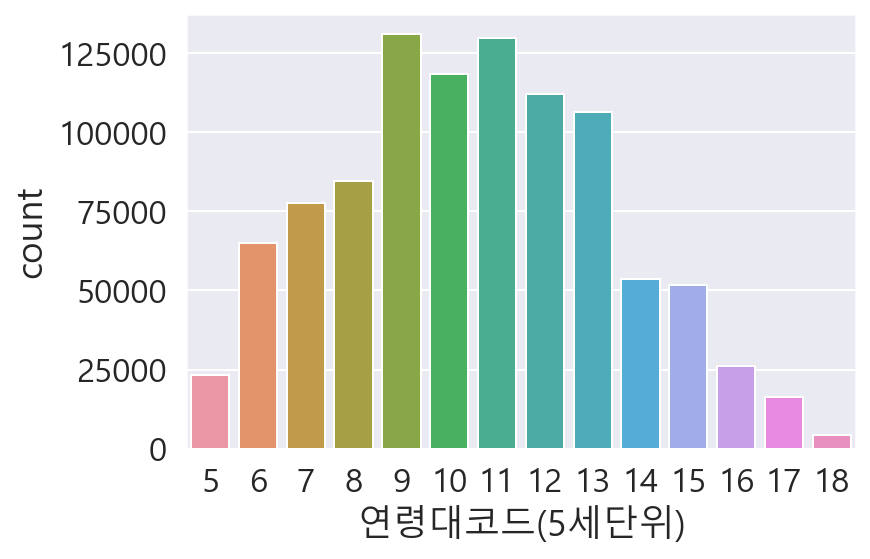

In [28]:
sns.countplot(data=df, x="연령대코드(5세단위)")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

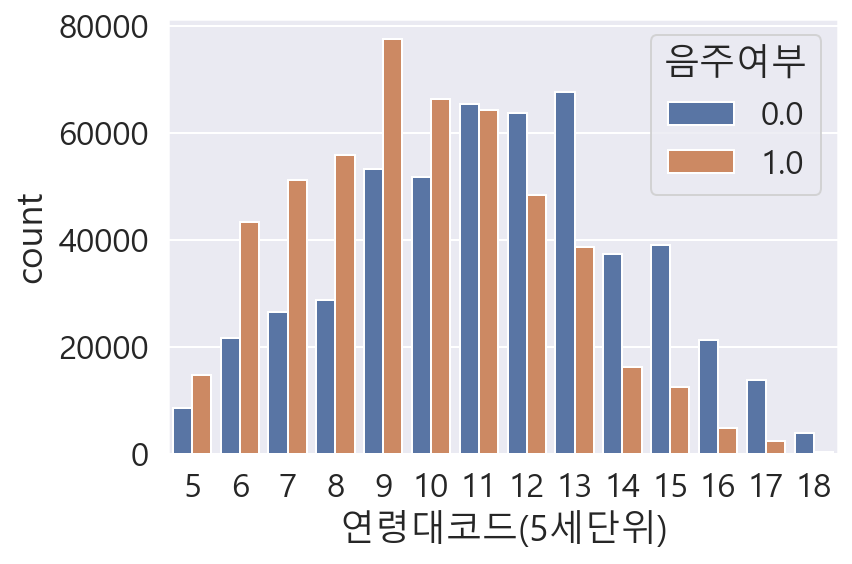

In [29]:
sns.countplot(data=df, x="연령대코드(5세단위)",hue = "음주여부")

# 14.3 countplot- 키와 몸무게

In [30]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5cm단위)")

ValueError: Could not interpret input '신장(5cm단위)'

<Figure size 1080x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)")

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Kg단위)", hue="성별코드")

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부")

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

# 14.4 barplot-수치형 vs 범주형 데이터 시각화

In [ ]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

In [ ]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드",hue="음주여부", ci="sd")

In [ ]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드",hue="음주여부", ci=None)

In [ ]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)",hue="성별코드", ci=None)

In [ ]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=None)

# 14.5 lineplot, pointplot

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",hue="성별코드", ci="sd")

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="성별코드", ci="sd")

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci="sd")

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci="sd")

In [ ]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci="sd")

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소",hue="음주여부", ci=None)

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

# 14.7 violinplot

In [ ]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x="신장(5Cm단위)",y="체중(5Kg 단위)")

In [ ]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)")

In [ ]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)",hue="음주여부")

In [ ]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)",hue="음주여부", split=True)

In [ ]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)",y="혈색소",hue="음주여부", split=True)

# 14.8 swarm plot 산점도 통해서 점으로 표기

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.0% of the points cann

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

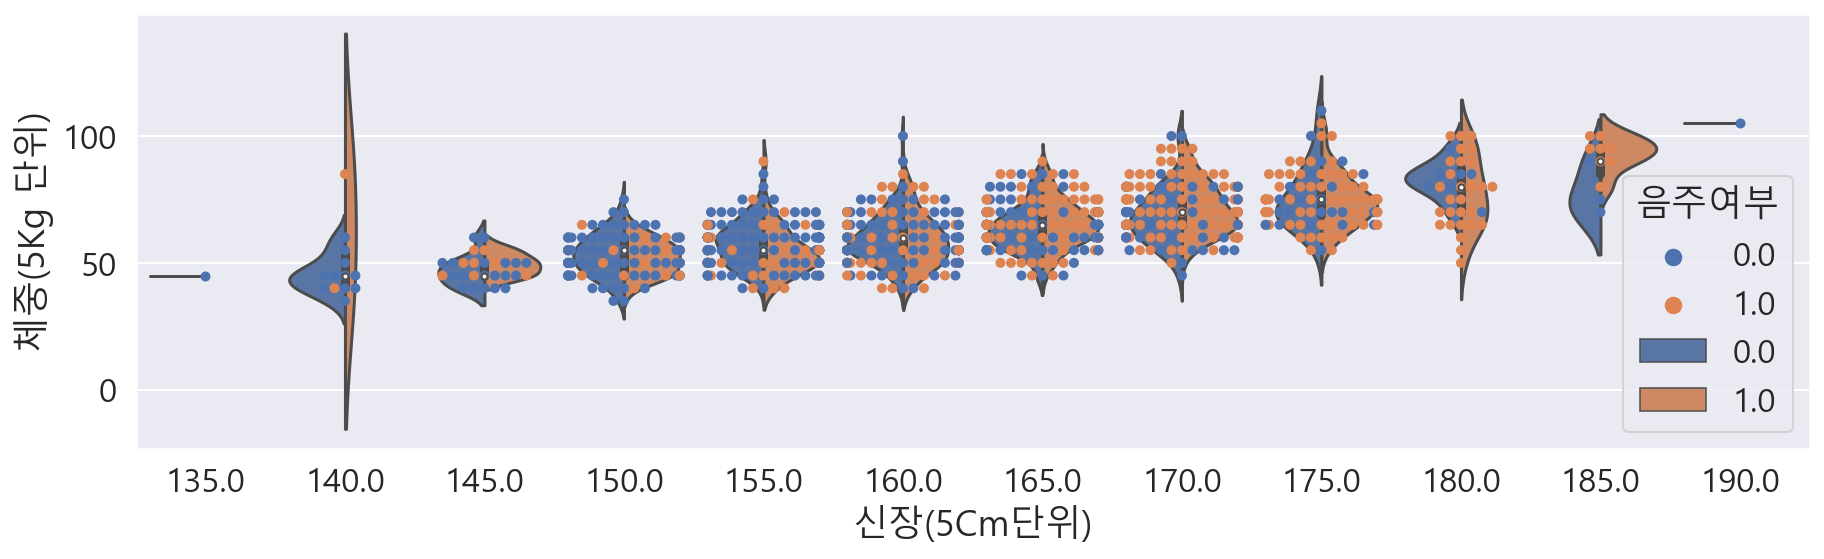

In [31]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)",hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)",hue="음주여부", split=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

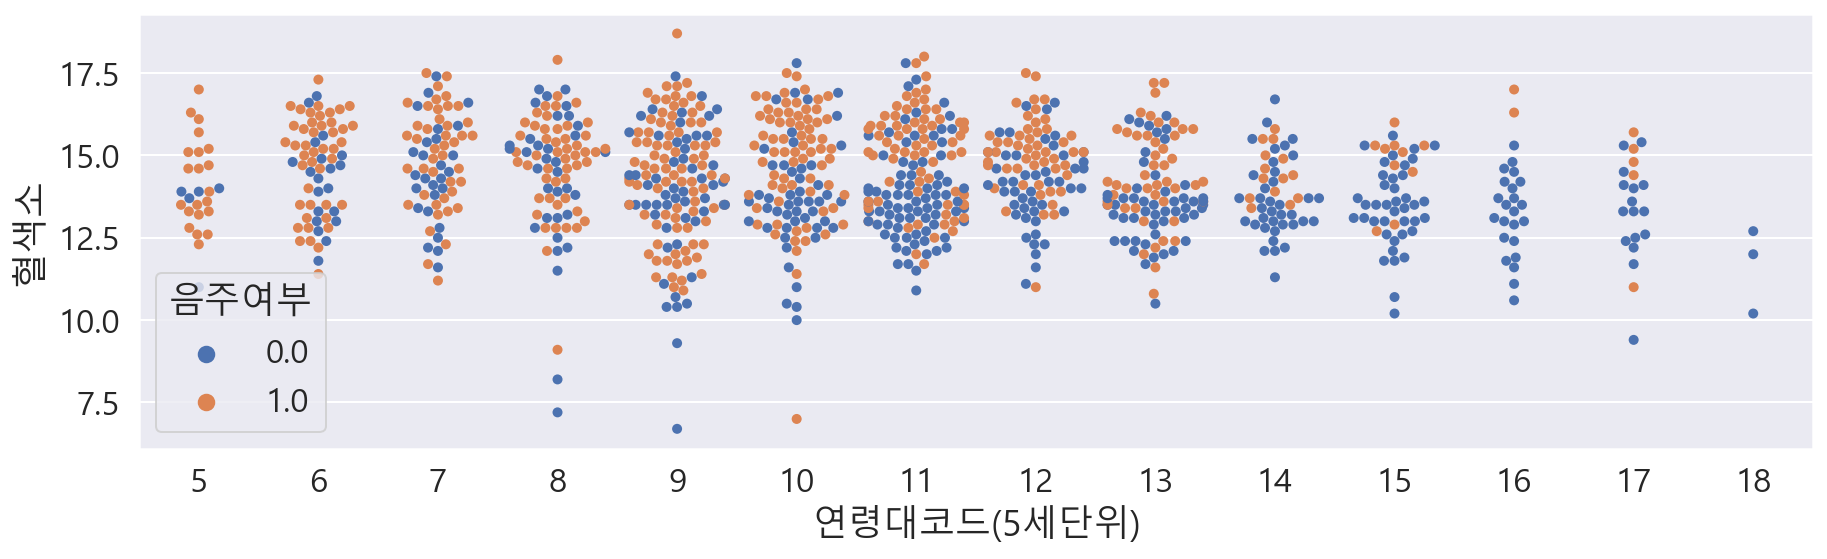

In [32]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)",y="혈색소",hue="음주여부")

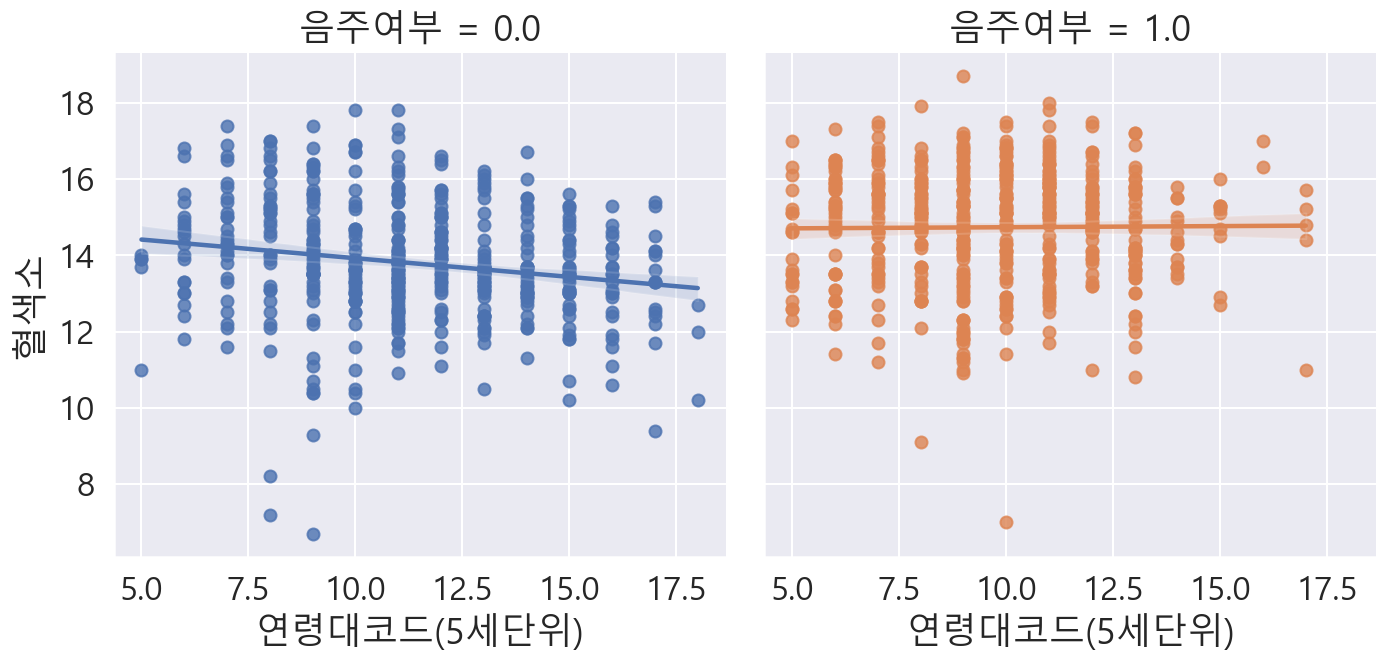

In [33]:
sns.lmplot(data=df_sample, x="연령대코드(5세단위)",y="혈색소",hue="음주여부", col="음주여부")

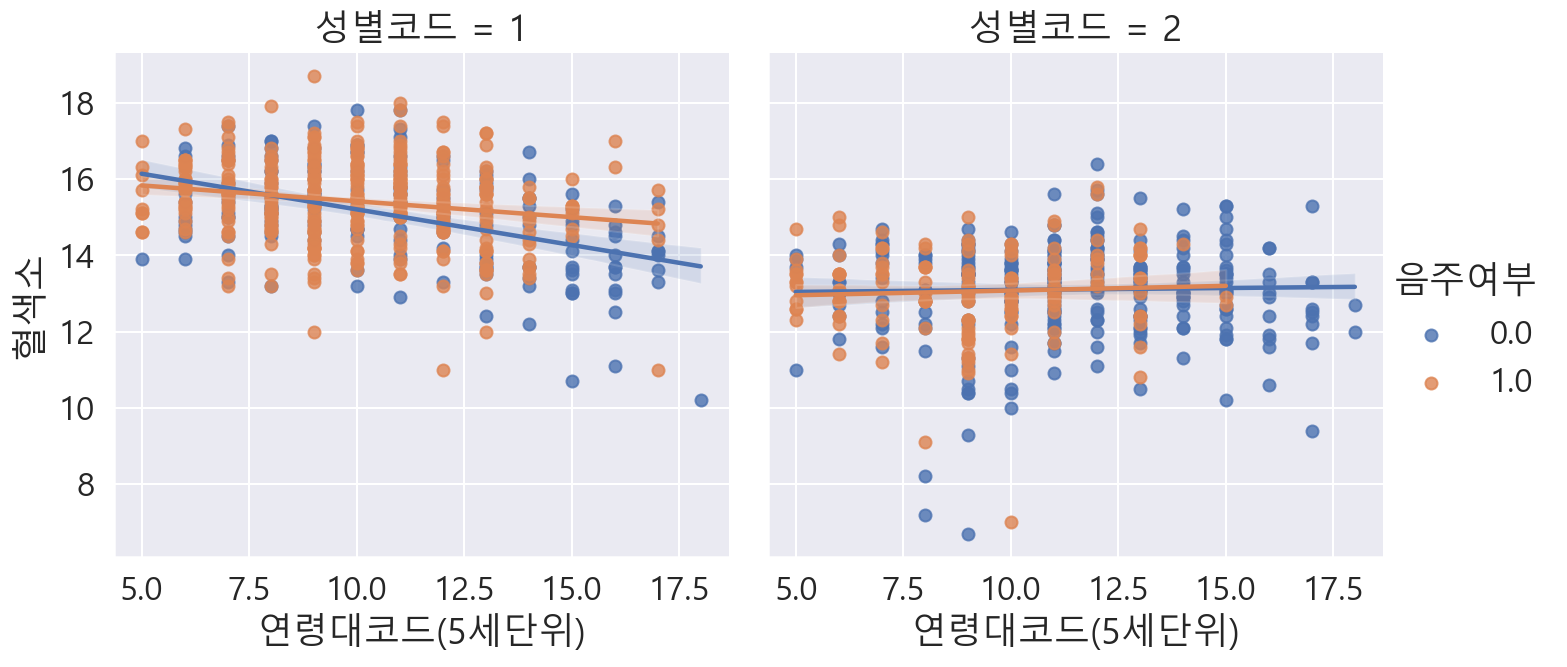

In [34]:
sns.lmplot(data=df_sample, x="연령대코드(5세단위)",y="혈색소",hue="음주여부", col="성별코드")

# 15. 수치형 데이터 시각화

# 15.1 scatter plot 산점도

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

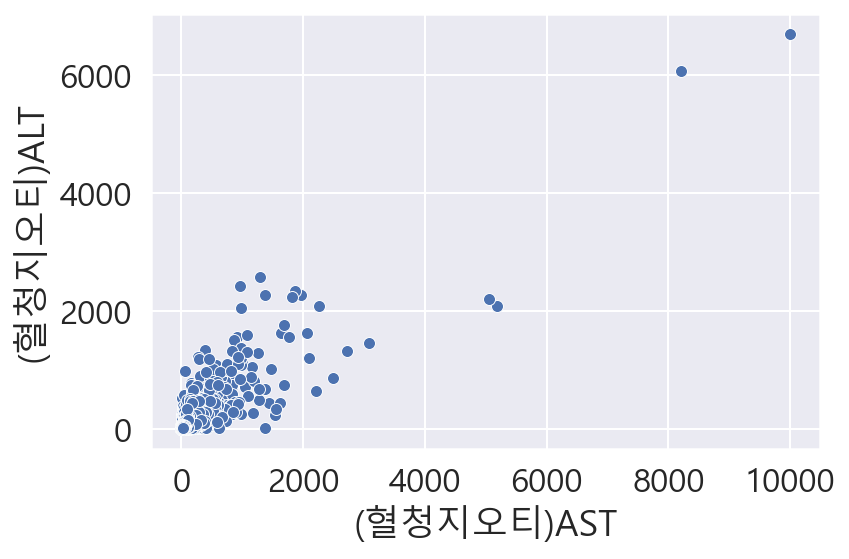

In [35]:
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

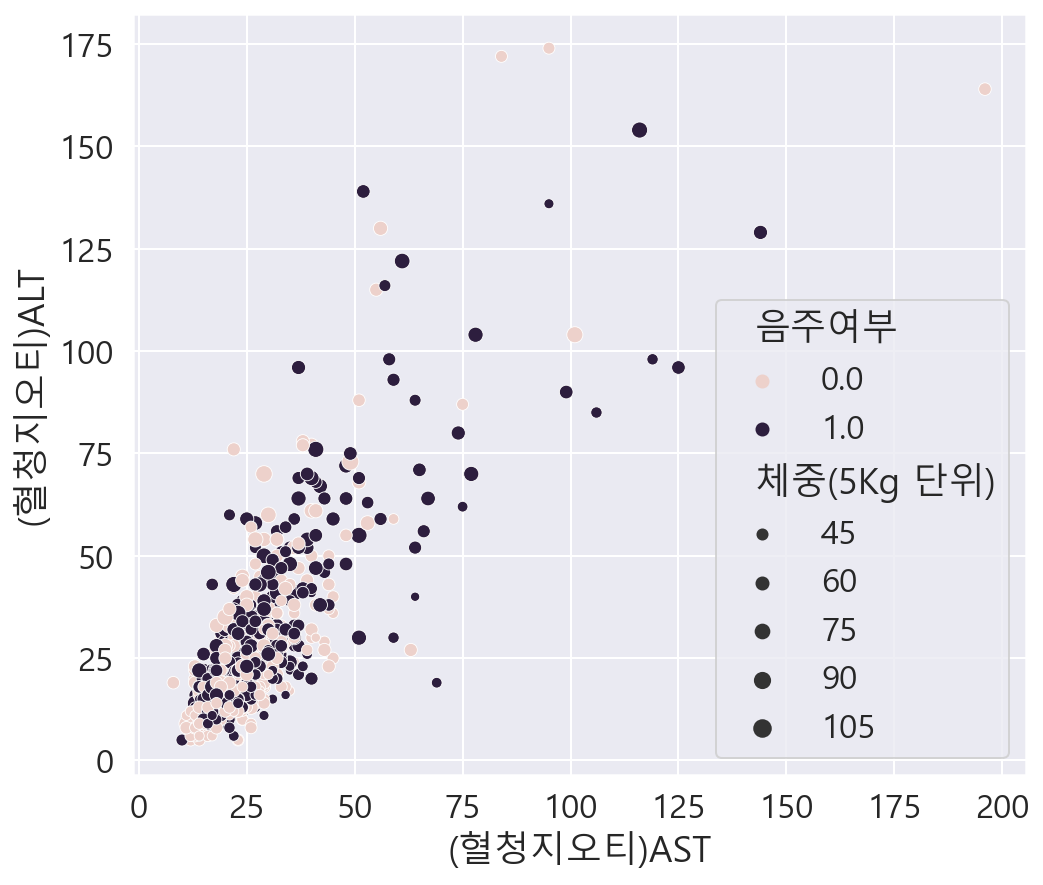

In [36]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부",size="체중(5Kg 단위)")

# 15.2 lmplot- 상관관계를 보기

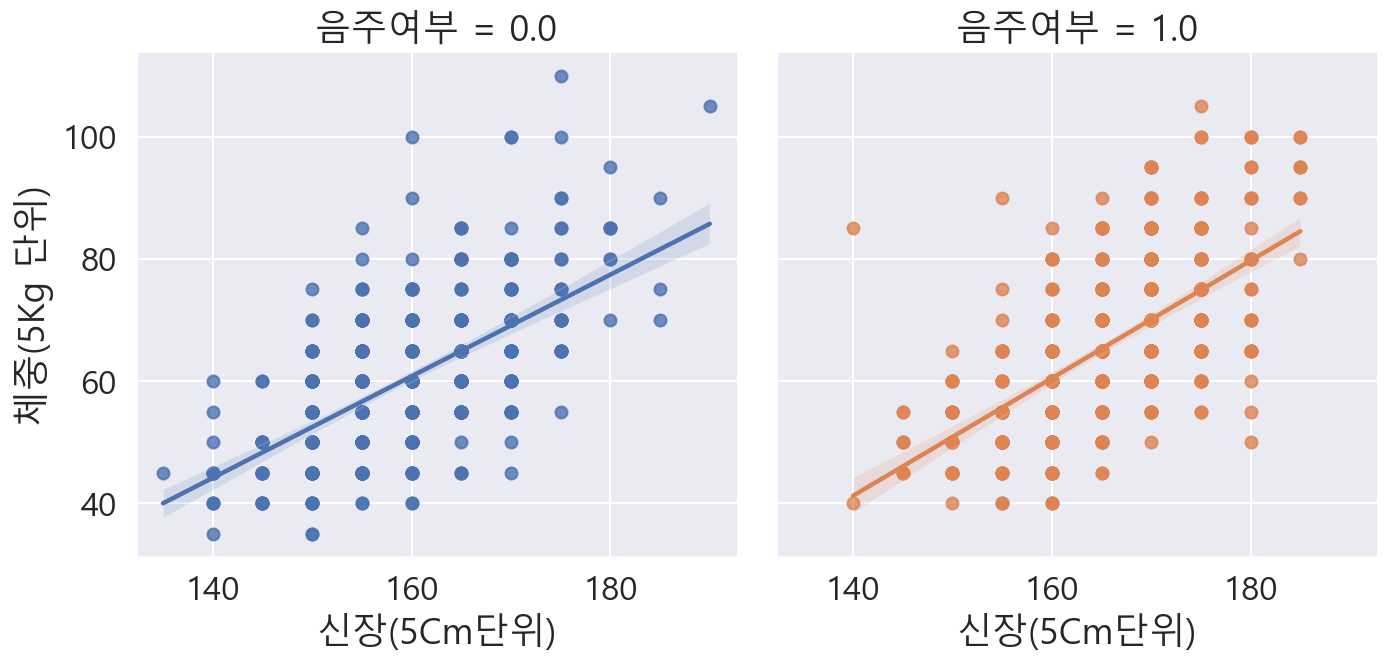

In [37]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="음주여부", col="음주여부")

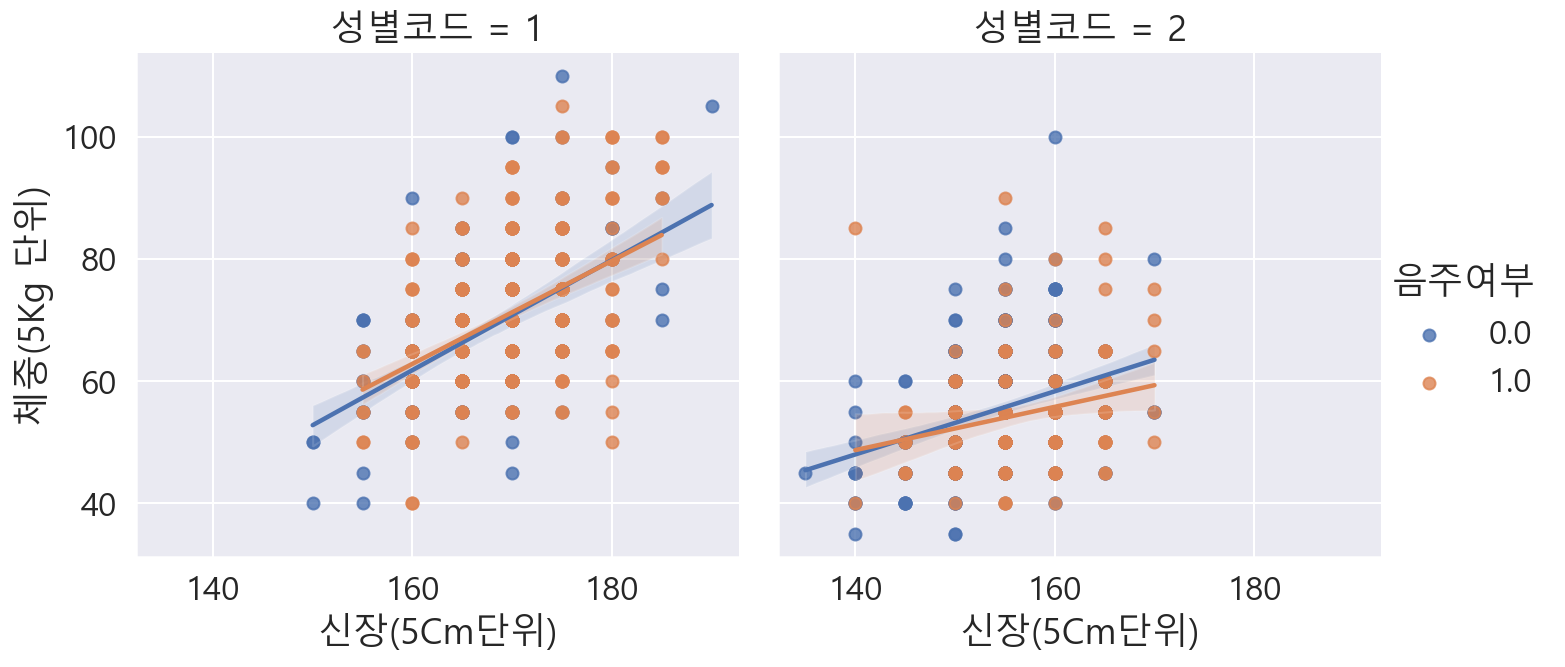

In [38]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="음주여부", col="성별코드")

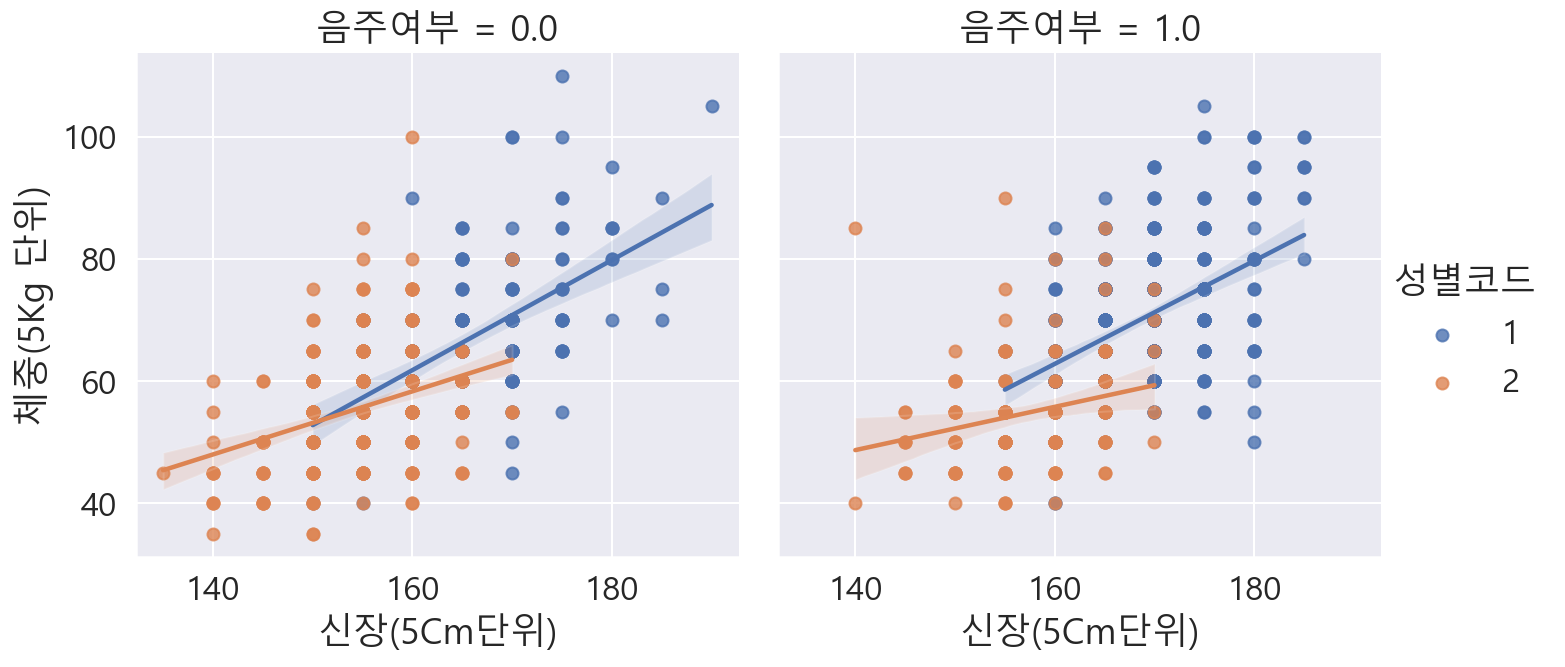

In [39]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="성별코드", col="음주여부")

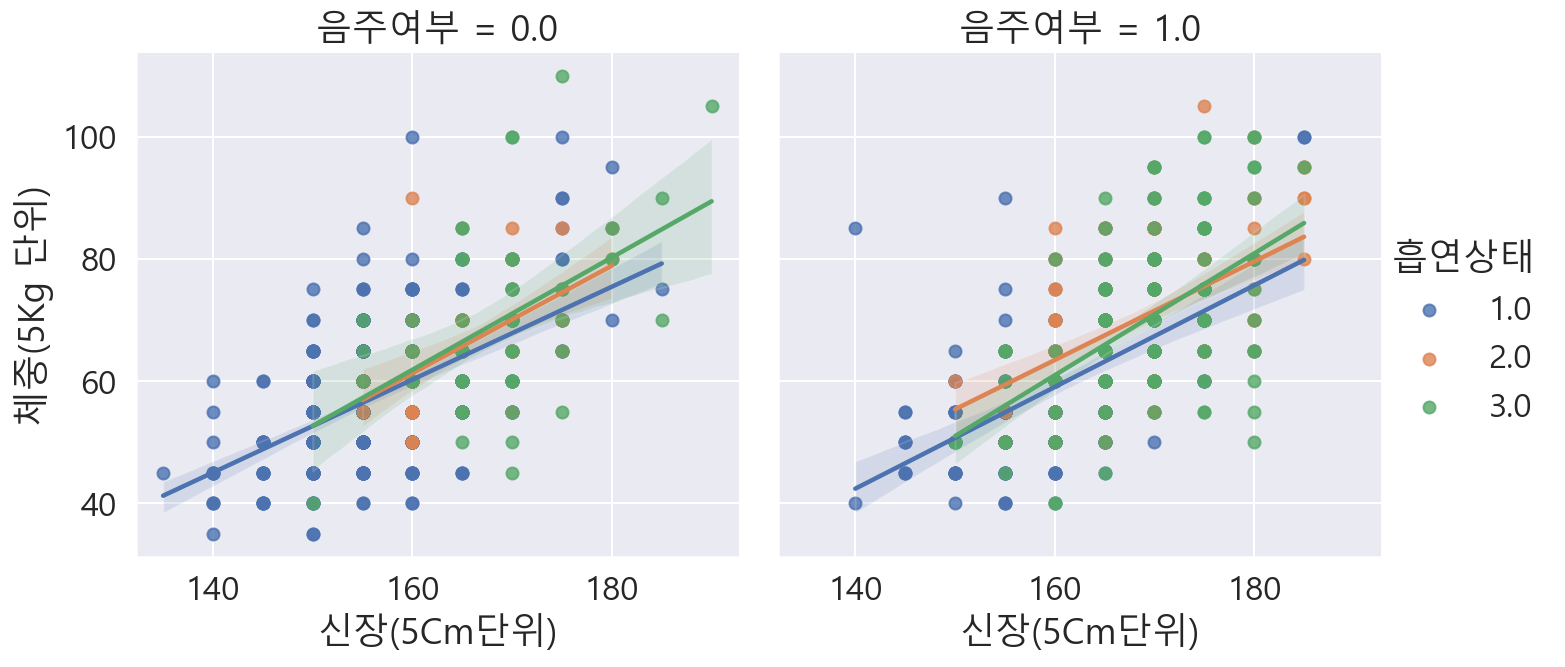

In [40]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="흡연상태", col="음주여부")

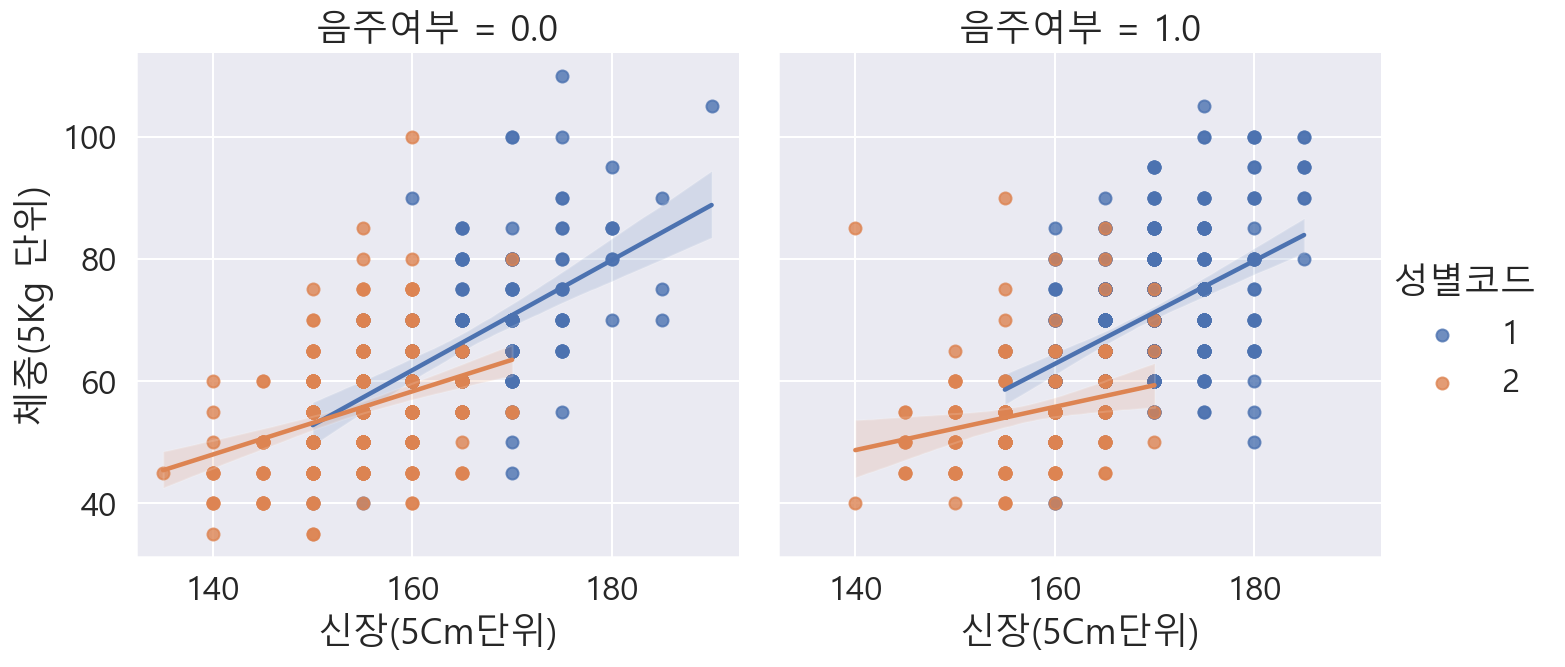

In [41]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)",y="체중(5Kg 단위)", hue="성별코드", col="음주여부")

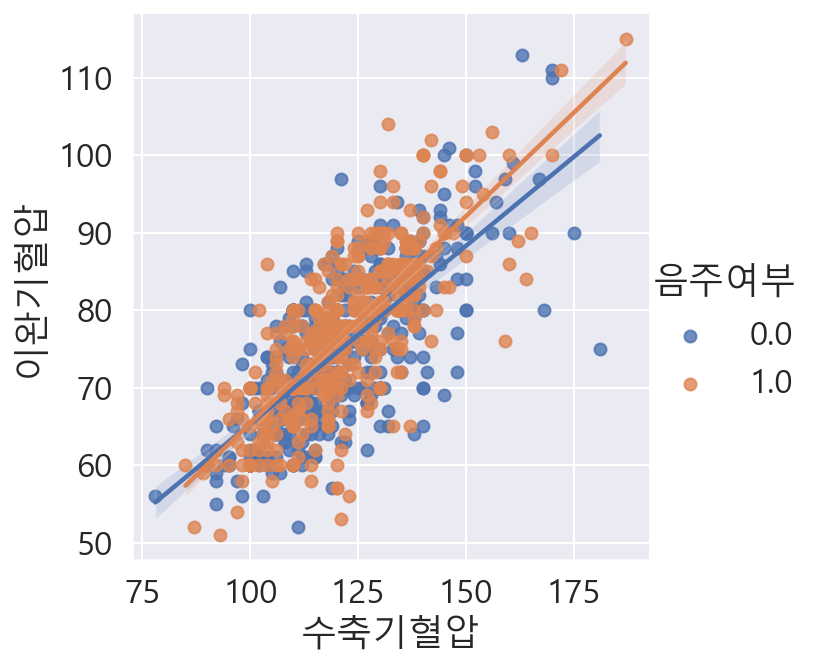

In [42]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압",hue="음주여부")

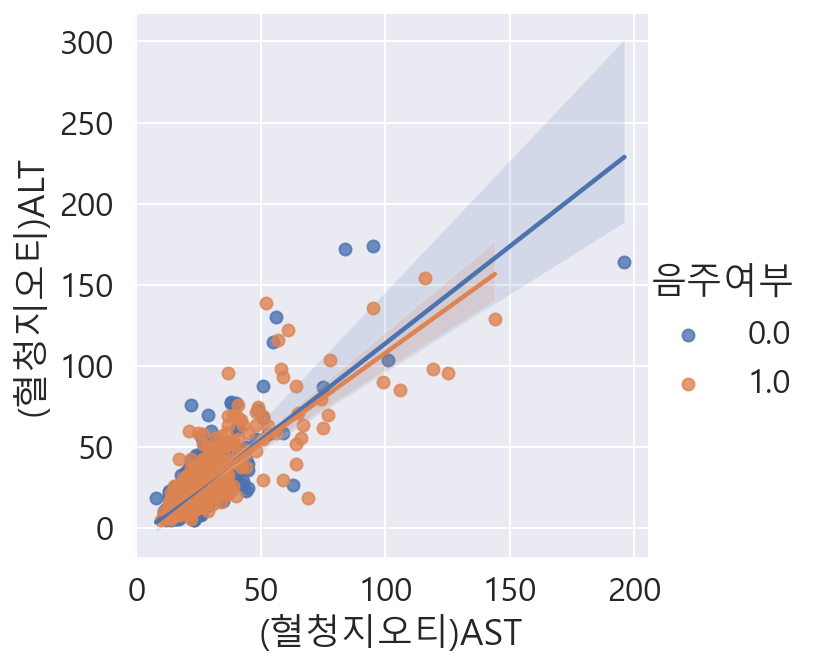

In [43]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

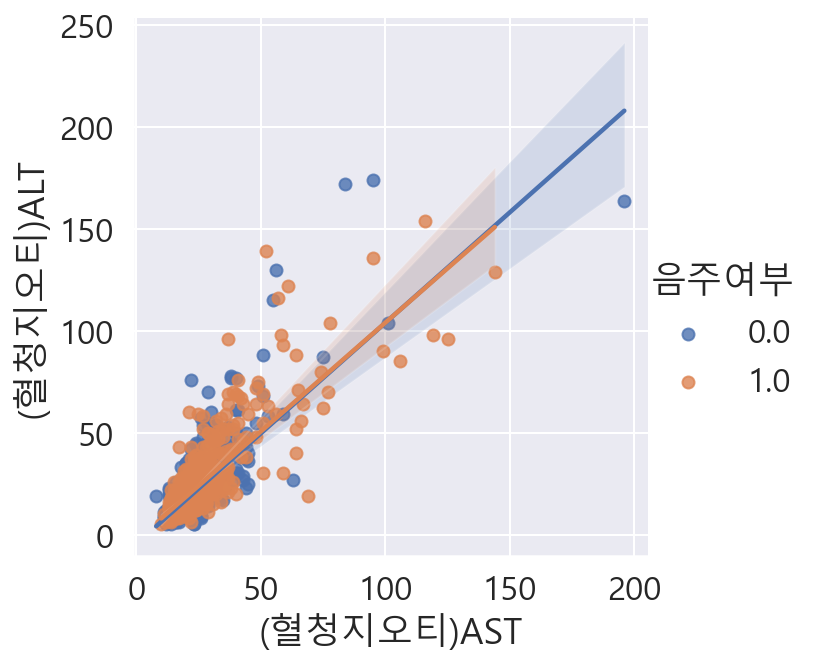

In [44]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

# 15.3 이상치 다루기


In [53]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400 ) & (df_sample["(혈청지오티)ALT"] < 400)]

In [63]:
sns,lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부",ci=None)

NameError: name 'lmplot' is not defined

In [60]:
df_ASLT_high = df[(df["(혈청지오티)AST"] < 400 ) | (df["(혈청지오티)ALT"] < 400)]

In [72]:
sns,lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부",ci=None)

NameError: name 'lmplot' is not defined

In [71]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

Empty DataFrame
Columns: [청력(좌), 청력(우), 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마지티피, 흡연상태, 음주여부]
Index: []

# 15.4 distplot 

11.1 히스토그램 


11.2 확률밀도함수

In [74]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [ ]:
sns.distplot(df["총콜레스테롤"].notnull())

In [77]:
df_chol = df[df["총콜레스테롤"].notnull()]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
0         1.0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN   
1         1.2    1.0  ...   10.0   1.0   0.0          1      NaN    NaN   
2         1.0    0.8  ...  136.0   1.0   0.0          1      NaN    NaN   
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
4         1.5    1.5  ...   68.0   3.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN           NaN  1.0  20181126  
1           NaN           NaN  1.0  20181126  
2           NaN           NaN  0.0  20181126  
3           NaN           NaN  NaN  20181126  
4           NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[999957 rows x 34 columns]

In [82]:
sns.distplot(df_chol["총콜레스테롤"])

KeyError: '총콜레스테롤'

In [87]:
df_chol = df.loc[df["총콜레스테롤"].notnull(),"총콜레스테롤"]
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

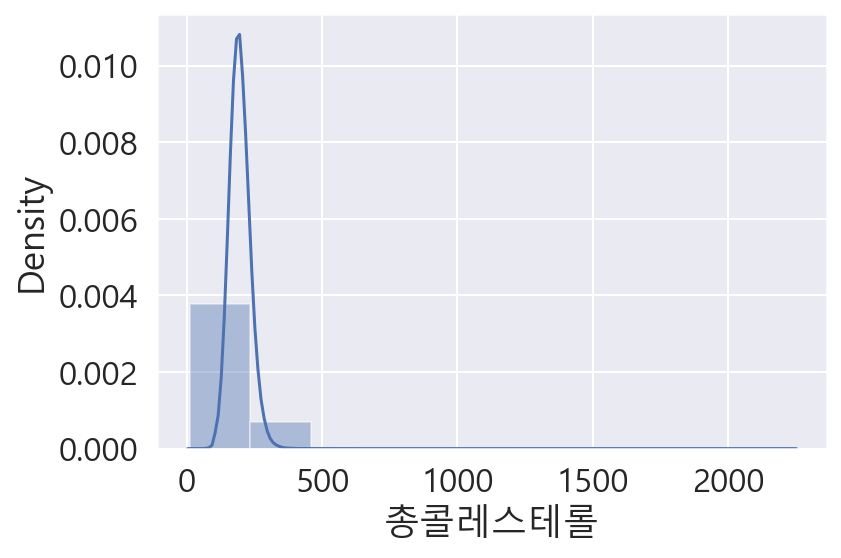

In [88]:
sns.distplot(df_chol, bins=10)

In [89]:
df_chol.describe()

count    999957.000000
mean        195.515105
std          38.937646
min          10.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2245.000000
Name: 총콜레스테롤, dtype: float64

In [90]:
df_chol

0         178.0
1         255.0
2         211.0
3         160.0
4         253.0
          ...  
999995    196.0
999996    199.0
999997    240.0
999998    267.0
999999    172.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

In [94]:
df[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1)]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
3       2017        4     2           12    11      155.0        55.0   67.5   
5       2017        6     1            8    11      170.0        70.0   84.8   
6       2017        7     1            8    48      175.0       110.0  111.5   
9       2017       10     1            8    11      170.0        70.0   86.0   
18      2017       19     1            8    30      175.0        80.0   88.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
999992  2017   999993     2            5    30      160.0        50.0   68.1   
999993  2017   999994     1            8    47      175.0        95.0   88.0   
999994  2017   999995     1           10    41      165.0        85.0   98.0   
999995  2017   999996     2            9    41      165.0        55.0   70.0   
999998  2017   999999     1           11    47      160.0        70.0   99.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
5         1.2    1.0  ...   33.0   2.0   1.0          1      NaN    NaN   
6         1.0    1.0  ...   45.0   3.0   1.0          0      NaN    NaN   
9         1.0    1.0  ...   88.0   1.0   1.0          1      NaN    NaN   
18        0.8    0.8  ...   18.0   2.0   1.0          1      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999992    1.0    1.0  ...   15.0   3.0   1.0          1      NaN    NaN   
999993    1.2    1.5  ...   93.0   3.0   1.0          0      NaN    NaN   
999994    0.7    0.9  ...   66.0   3.0   1.0          0      NaN    NaN   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
3           NaN           NaN  NaN  20181126  
5           NaN           NaN  1.0  20181126  
6           NaN           NaN  NaN  20181126  
9           NaN           NaN  0.0  20181126  
18          NaN           NaN  0.0  20181126  
...         ...           ...  ...       ...  
999992      NaN           NaN  1.0  20181126  
999993      NaN           NaN  NaN  20181126  
999994      NaN           NaN  NaN  20181126  
999995      NaN           NaN  NaN  20181126  
999998      NaN           NaN  NaN  20181126  

[496733 rows x 34 columns]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

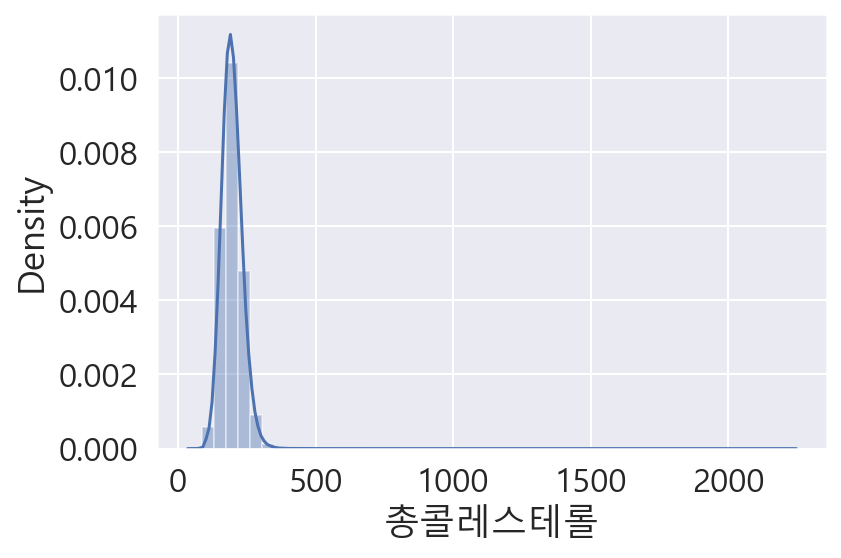

In [95]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

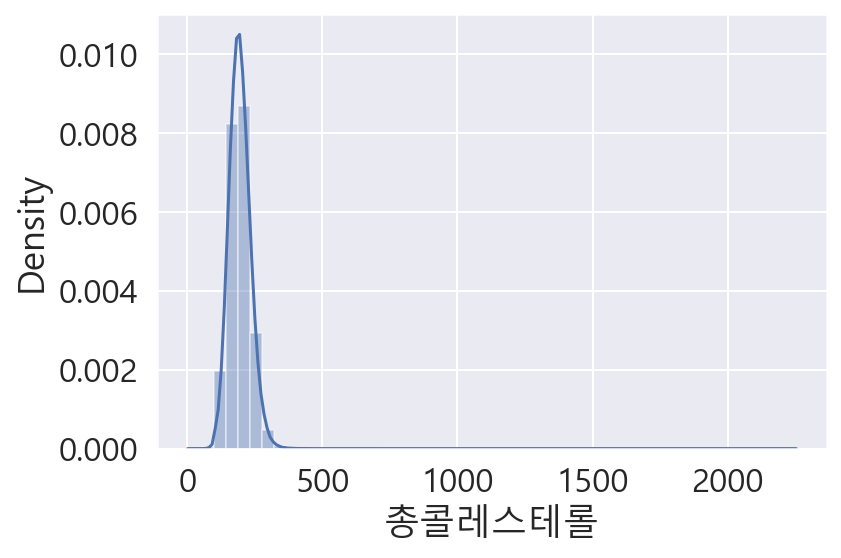

In [96]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

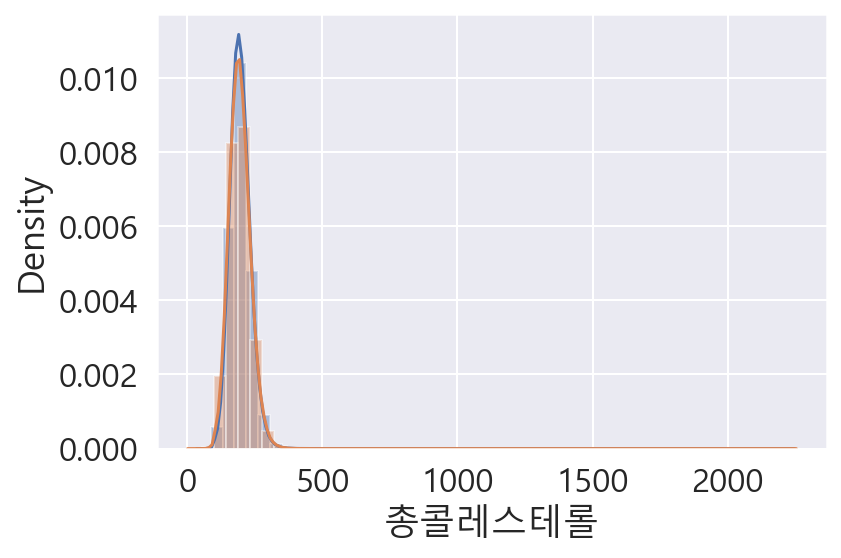

In [97]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"])
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"])

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

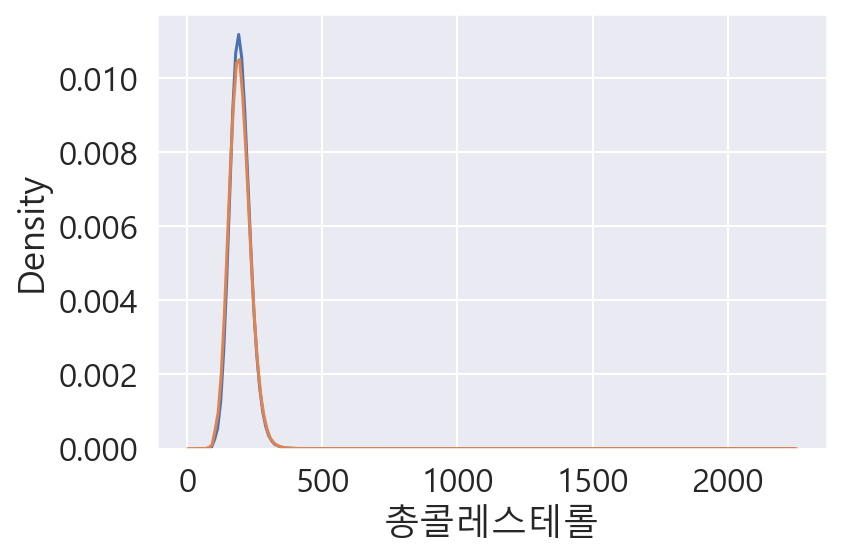

In [100]:
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"],label="음주 중")
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"],label="음주 안함")

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

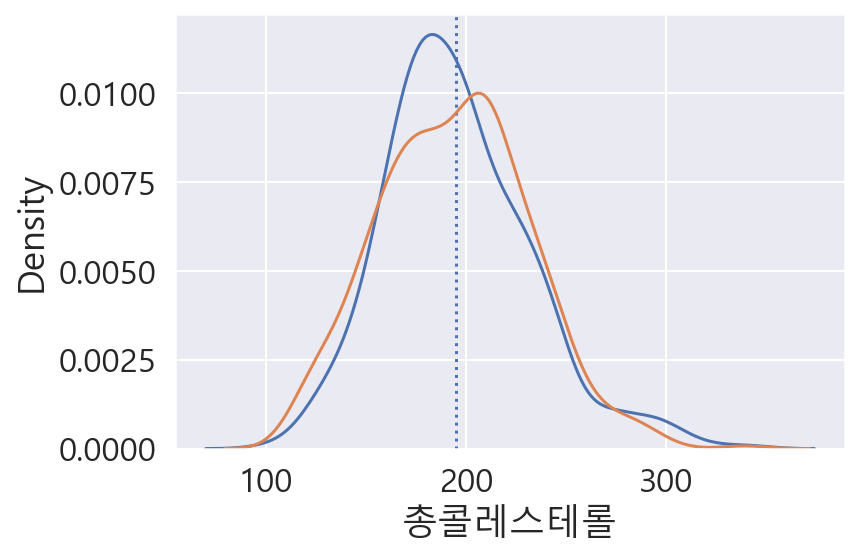

In [104]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
sns.kdeplot(df.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"],label="음주 중")
sns.kdeplot(df.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"],label="음주 안함")

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

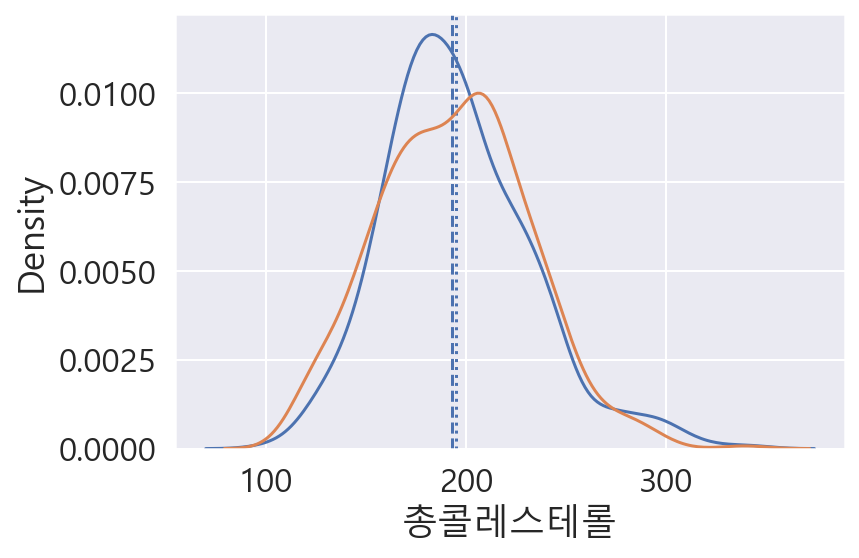

In [105]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"],label="음주 중")
sns.kdeplot(df.loc[df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"],label="음주 안함")

In [106]:
df_sample["감마지티피"]

276826     35.0
849425     19.0
504499     15.0
601054     13.0
980221    265.0
          ...  
890013     22.0
875389     12.0
358458     11.0
808228    122.0
317698     22.0
Name: 감마지티피, Length: 1000, dtype: float64

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

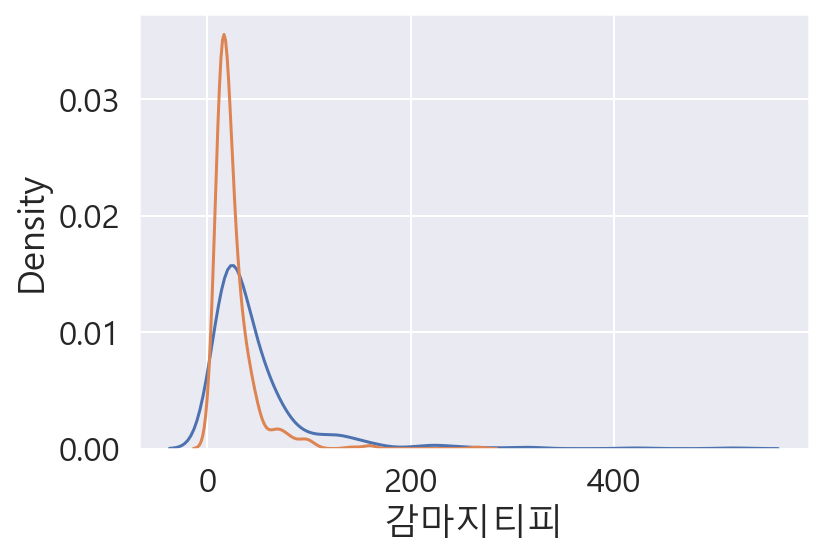

In [115]:
s_1 = df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]
sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안함")

# 16 상관분석


신장과 허리둘레가 체중과 상관관계가 있는지

두 변수간의 선형적 비선형 확인


두 상관계수의 연관관계만 볼 뿐 인과관계를 보는 것은 아니다.


두 변수간에 원인과 결과는 회귀분석을 통해서 확인할 수 있다.


In [120]:
columns = ['연령대코드(5세단위)', '체중(5Kg 단위)', '신장(5Cm단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg 단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [122]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  체중(5Kg 단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000   -0.210610  -0.397412  0.134720 -0.201947 -0.203802   
체중(5Kg 단위)     -0.210610    1.000000   0.648489  0.790520  0.076534  0.133502   
신장(5Cm단위)      -0.397412    0.648489   1.000000  0.293774  0.141800  0.156605   
허리둘레            0.134720    0.790520   0.293774  1.000000 -0.033007  0.034518   
시력(좌)          -0.201947    0.076534   0.141800 -0.033007  1.000000  0.462877   
시력(우)          -0.203802    0.133502   0.156605  0.034518  0.462877  1.000000   
청력(좌)           0.193769   -0.038100  -0.100178  0.048379 -0.049368 -0.041439   
청력(우)           0.253585   -0.070590  -0.121083  0.052245 -0.084603 -0.096255   
수축기혈압           0.296807    0.244673   0.030012  0.333025 -0.010112 -0.020638   
이완기혈압           0.149758    0.287084   0.118103  0.302398 -0.001695  0.012802   
식전혈당(공복혈당)      0.166079    0.155556   0.059881  0.219585 -0.075272  0.006790   
총콜레스테롤          0.005873    0.082305  -0.013813  0.081332  0.005267  0.038706   
트리글리세라이드        0.033434    0.238945   0.113687  0.288572  0.029648  0.018477   
HDL콜레스테롤       -0.121635   -0.357603  -0.152505 -0.409940  0.021295 -0.030666   
LDL콜레스테롤        0.023206    0.106049  -0.003485  0.098301 -0.015221  0.044949   
혈색소            -0.165788    0.508366   0.529475  0.377023  0.073866  0.056753   
요단백            -0.022885    0.028840   0.014089 -0.002252  0.010995  0.009548   
혈청크레아티닌         0.020587    0.190769   0.243101  0.149351  0.018104  0.031835   
(혈청지오티)AST      0.106376    0.196722   0.035321  0.229202  0.003379  0.024706   
(혈청지오티)ALT     -0.014101    0.372930   0.187945  0.357288  0.029429  0.083163   
감마지티피           0.052946    0.254150   0.171372  0.271566  0.011519  0.045560   
흡연상태           -0.136350    0.397230   0.505945  0.268685  0.063964  0.054681   
음주여부           -0.277149    0.235974   0.362905  0.084514  0.073696  0.063220   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.193769  0.253585  0.296807  0.149758  ... -0.121635  0.023206   
체중(5Kg 단위)  -0.038100 -0.070590  0.244673  0.287084  ... -0.357603  0.106049   
신장(5Cm단위)   -0.100178 -0.121083  0.030012  0.118103  ... -0.152505 -0.003485   
허리둘레         0.048379  0.052245  0.333025  0.302398  ... -0.409940  0.098301   
시력(좌)       -0.049368 -0.084603 -0.010112 -0.001695  ...  0.021295 -0.015221   
시력(우)       -0.041439 -0.096255 -0.020638  0.012802  ... -0.030666  0.044949   
청력(좌)        1.000000  0.512849  0.105602  0.034535  ... -0.015340 -0.018551   
청력(우)        0.512849  1.000000  0.127883  0.041907  ... -0.078820 -0.059298   
수축기혈압        0.105602  0.127883  1.000000  0.744132  ... -0.138843  0.003982   
이완기혈압        0.034535  0.041907  0.744132  1.000000  ... -0.090783  0.045014   
식전혈당(공복혈당)  -0.000567  0.035457  0.168399  0.134820  ... -0.136568 -0.038186   
총콜레스테롤      -0.034960 -0.095937  0.047920  0.097394  ...  0.137891  0.880425   
트리글리세라이드    -0.029229 -0.027957  0.187875  0.166679  ... -0.383788  0.011516   
HDL콜레스테롤    -0.015340 -0.078820 -0.138843 -0.090783  ...  1.000000 -0.062431   
LDL콜레스테롤    -0.018551 -0.059298  0.003982  0.045014  ... -0.062431  1.000000   
혈색소         -0.015990 -0.031084  0.143038  0.219912  ... -0.208488  0.112034   
요단백         -0.026771 -0.013656  0.016896  0.021567  ... -0.005009 -0.004715   
혈청크레아티닌     -0.026352 -0.030057  0.090268  0.131162  ... -0.142140  0.037578   
(혈청지오티)AST   0.014587  0.002233  0.143089  0.159043  ... -0.031833  0.011017   
(혈청지오티)ALT   0.003031 -0.023672  0.118240  0.154490  ... -0.179211  0.075795   
감마지티피       -0.006351  0.005842  0.176208  0.204673  ... -0.121648  0.046815   
흡연상태        -0.034204 -0.040937  0.108511  0.144251  ... -0.188906 -0.011593   
음주여부        -0.037669 -0.032475  0.032543  0.110143  ...  0.052452 -0.046947   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.165788 -0.022885  0.020587    0.106376   -0.014101  0

In [125]:
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.397412
HDL콜레스테롤      -0.152505
청력(우)         -0.121083
청력(좌)         -0.100178
총콜레스테롤        -0.013813
LDL콜레스테롤      -0.003485
요단백            0.014089
수축기혈압          0.030012
(혈청지오티)AST     0.035321
식전혈당(공복혈당)     0.059881
트리글리세라이드       0.113687
이완기혈압          0.118103
시력(좌)          0.141800
시력(우)          0.156605
감마지티피          0.171372
(혈청지오티)ALT     0.187945
혈청크레아티닌        0.243101
허리둘레           0.293774
음주여부           0.362905
흡연상태           0.505945
혈색소            0.529475
체중(5Kg 단위)     0.648489
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [128]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg 단위)    0.648489
신장(5Cm단위)     1.000000
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [129]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

체중(5Kg 단위)    0.648489
신장(5Cm단위)     1.000000
허리둘레          0.293774
시력(좌)         0.141800
시력(우)         0.156605
이완기혈압         0.118103
트리글리세라이드      0.113687
혈색소           0.529475
혈청크레아티닌       0.243101
(혈청지오티)ALT    0.187945
감마지티피         0.171372
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [130]:
df_corr.loc[df_corr["음주여부"] > 0.1, "음주여부"]

체중(5Kg 단위)    0.235974
신장(5Cm단위)     0.362905
이완기혈압         0.110143
트리글리세라이드      0.103018
혈색소           0.291863
감마지티피         0.250011
흡연상태          0.365642
음주여부          1.000000
Name: 음주여부, dtype: float64

In [131]:
df_corr["음주여부"].sort_values()

연령대코드(5세단위)   -0.277149
LDL콜레스테롤      -0.046947
청력(좌)         -0.037669
청력(우)         -0.032475
요단백           -0.012932
총콜레스테롤         0.019892
수축기혈압          0.032543
HDL콜레스테롤       0.052452
시력(우)          0.063220
혈청크레아티닌        0.072320
시력(좌)          0.073696
허리둘레           0.084514
식전혈당(공복혈당)     0.086991
(혈청지오티)AST     0.088594
(혈청지오티)ALT     0.095971
트리글리세라이드       0.103018
이완기혈압          0.110143
체중(5Kg 단위)     0.235974
감마지티피          0.250011
혈색소            0.291863
신장(5Cm단위)      0.362905
흡연상태           0.365642
음주여부           1.000000
Name: 음주여부, dtype: float64

In [132]:
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

In [135]:
df_corr["혈색소"].sort_values()

HDL콜레스테롤      -0.208488
연령대코드(5세단위)   -0.165788
청력(우)         -0.031084
청력(좌)         -0.015990
요단백            0.019795
시력(우)          0.056753
시력(좌)          0.073866
LDL콜레스테롤       0.112034
총콜레스테롤         0.122240
식전혈당(공복혈당)     0.131582
수축기혈압          0.143038
(혈청지오티)AST     0.171762
트리글리세라이드       0.200421
혈청크레아티닌        0.214091
이완기혈압          0.219912
감마지티피          0.236197
음주여부           0.291863
(혈청지오티)ALT     0.294575
허리둘레           0.377023
흡연상태           0.460010
체중(5Kg 단위)     0.508366
신장(5Cm단위)      0.529475
혈색소            1.000000
Name: 혈색소, dtype: float64

In [137]:
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
흡연상태          0.460010
허리둘레          0.377023
(혈청지오티)ALT    0.294575
음주여부          0.291863
Name: 혈색소, dtype: float64

In [138]:
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.525509
(혈청지오티)ALT    0.514197
트리글리세라이드      0.335514
흡연상태          0.305811
식전혈당(공복혈당)    0.292087
허리둘레          0.271566
Name: 감마지티피, dtype: float64

# 16.2 heatmap


<AxesSubplot:>

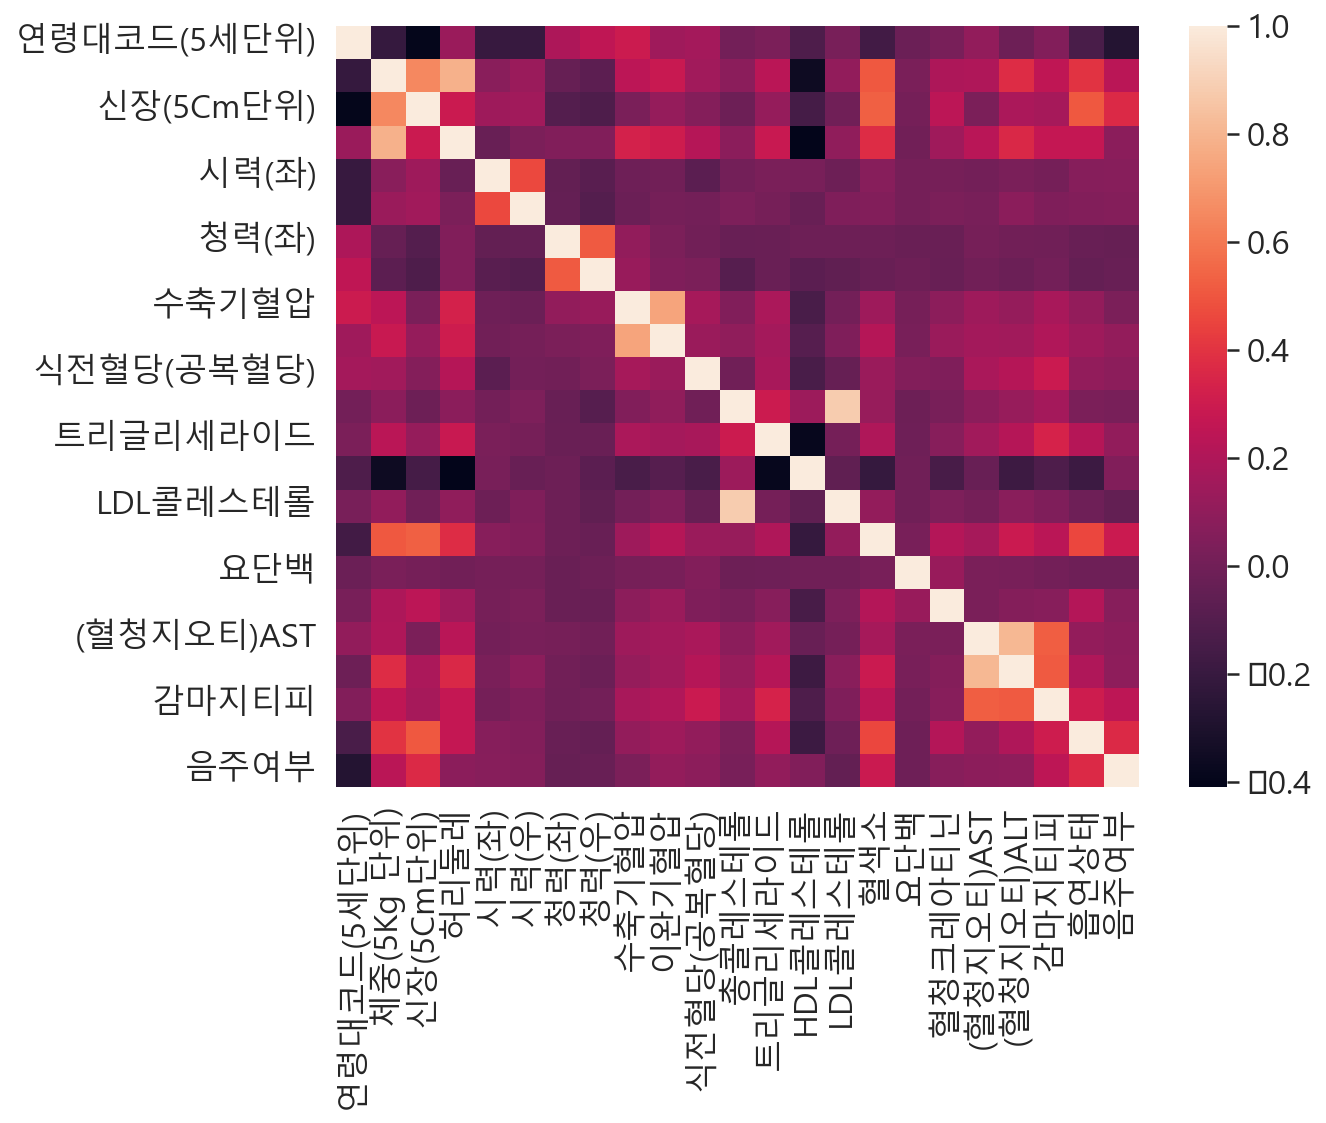

In [141]:
plt.figure(figsize=(9,7))
sns.heatmap(df_corr)

<AxesSubplot:>

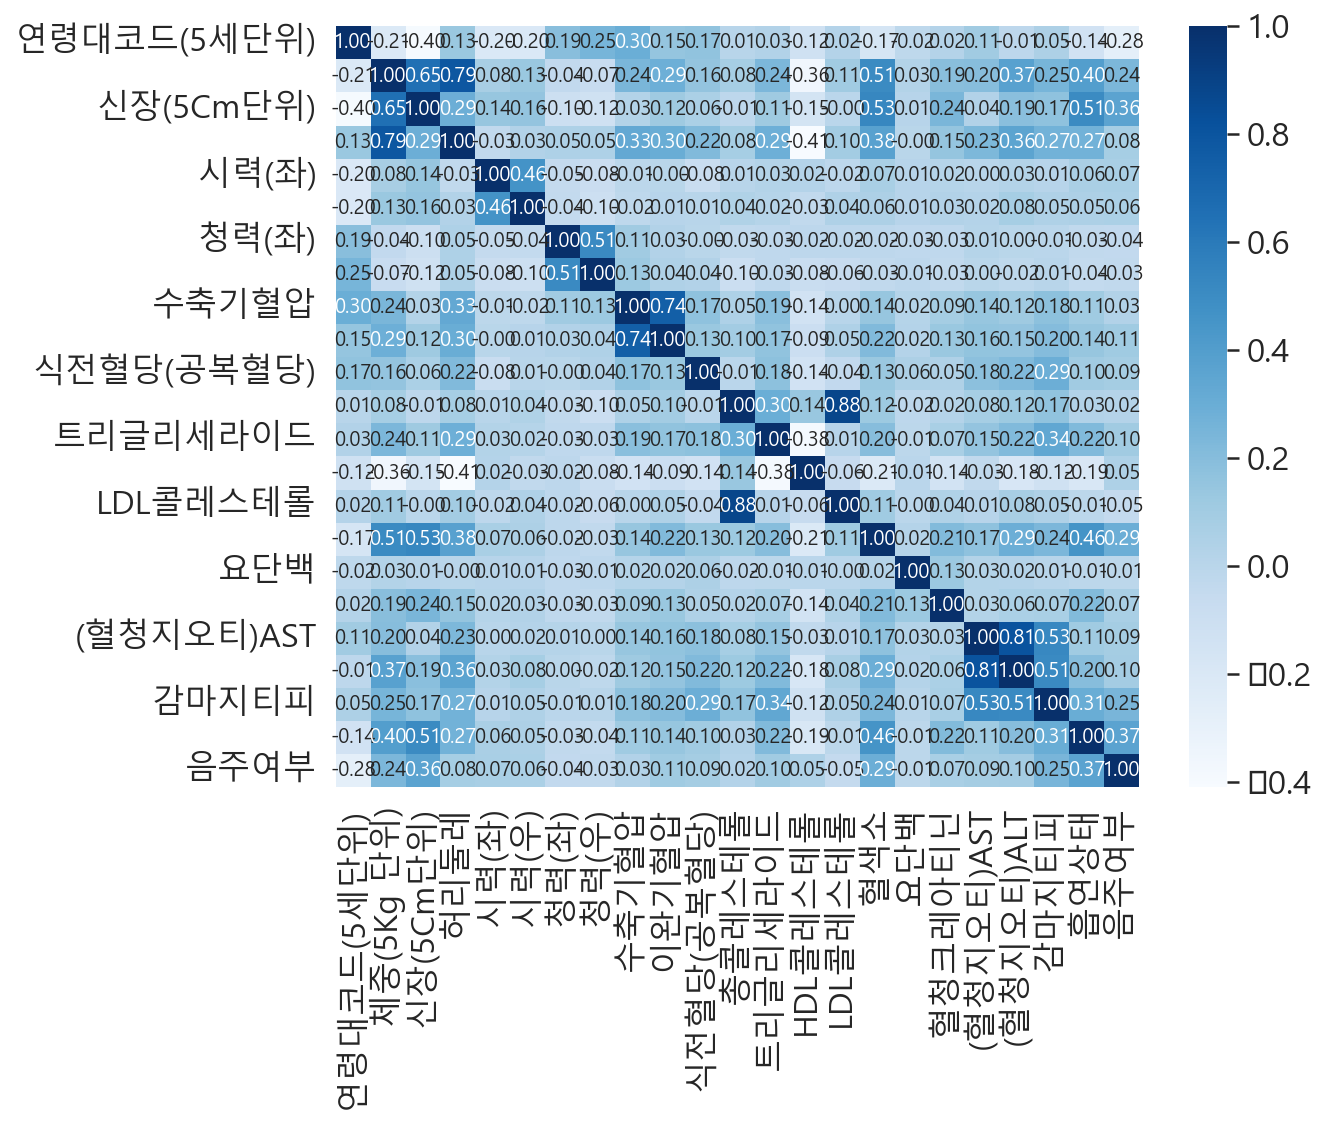

In [144]:
plt.figure(figsize=(9,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

In [146]:
mask = np.triu(np.ones_like(df_corr,dtype=np.bool))
mask

C:\Users\USER\AppData\Local\Temp\ipykernel_3580\3168719865.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr,dtype=np.bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

C:\Users\USER\AppData\Local\Temp\ipykernel_3580\2620807577.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr,dtype=np.bool))


<AxesSubplot:>

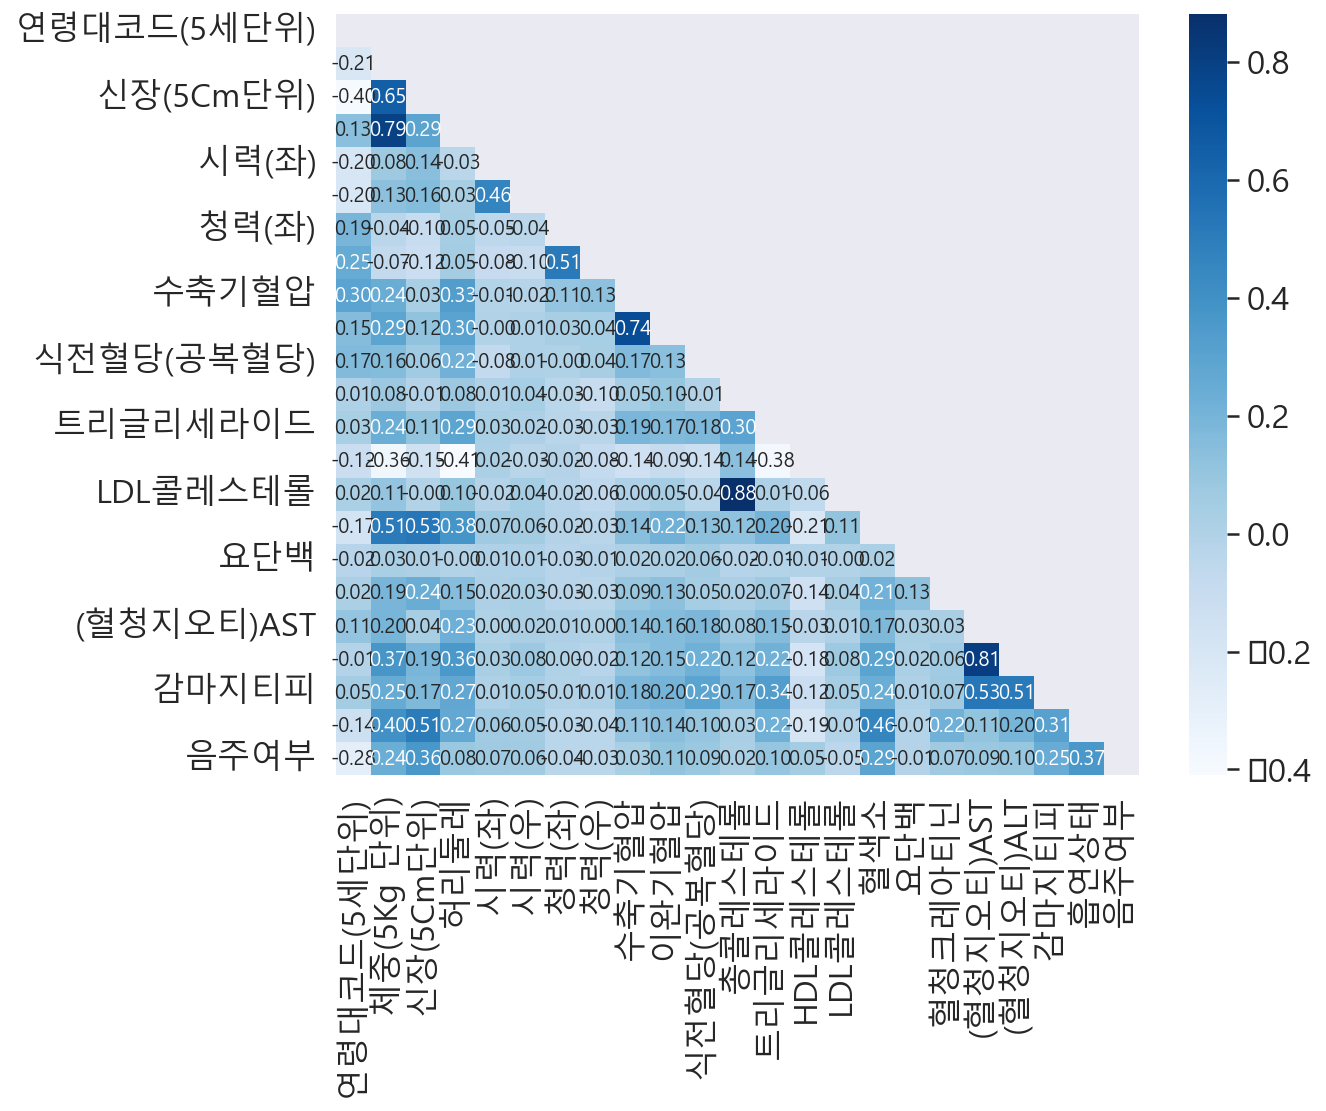

In [147]:
mask = np.triu(np.ones_like(df_corr,dtype=np.bool))
plt.figure(figsize=(9,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues",mask=mask)